<a href="https://colab.research.google.com/github/kk-shetty/data_science_ik/blob/main/class_notes/eda_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Feature Engineering

When we are building any model there are lots of questions that that we needs to find answer before we jump into building any model.
1. Should we use every available attributes in our dataset as a feature?
2. Can there be negative impact on the model if it has too many features?
3. Should we use all the available sample to train the model (select the coefficient)?
4. Should we reserve some data for validation?
5. How to handle non-numeric attributes?
6. What if there are some missing values in the sample for few attributes?

#### Overfitting:
1. The dataset that we use to fit a model is called **training set**.
2. An independent set used for model evaluation is called **test set**.
3. A model can be negatively impacted if there are too many features.
4. The data set that we use to fit a model can have some pattern + noise
5. If we use more complex model to fit this training data more closely, we are likely fitting to noise in the data at some point.
6. This model doesn't generalize well outside the training data.

#### Summary:
1. Careful EDA and FGeature engineering can improve accuracy and robustness of ML Models.
2. Fitiing amodel to the training set is easy but fitting a model that performs equally well on unseen data is a key challenge.
3. We need to be casefull in selecting the class of model and it's features that we use with models to avoid overfitting the model to training data.
4. Overfitting occurs when we fit a model to noise in the training set.
5. reserve some data for testing.

## Exploratory Data Analysis

### 1. Load the data into pandas data frame

In [29]:
import pandas as pd
from google.colab import drive

In [30]:
# Mounting google drive to colab notebook
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/housing_price_train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Load data from drive and store in data frame
df = pd.read_csv(file_path)

### 2. Initial Data Exploration - Inspect first few lines of the data

In [18]:
# Changing the setting to to see all the columns
pd.set_option('display.max_columns', None)

In [19]:
# Check the sample data from df
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
773,774,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
499,500,20,RL,70.0,7535,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1958,1985,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,111,LwQ,279,522,912,GasA,Fa,Y,SBrkr,912,0,0,912,0,1,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,Fin,1,297,TA,TA,Y,12,285,0,0,0,0,NaN,MnWw,Shed,480,6,2007,WD,Normal,120000
424,425,20,RL,72.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1956,1956,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,74.0,TA,TA,CBlock,Gd,TA,No,LwQ,616,Unf,0,580,1196,GasA,Gd,Y,FuseA,1196,0,0,1196,1,0,1,0,2,1,TA,6,Typ,1,Gd,Attchd,1956.0,RFn,1,297,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,139000
540,541,20,RL,85.0,14601,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,584.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1260,Unf,0,578,1838,GasA,Ex,Y,SBrkr,1838,0,0,1838,1,0,2,0,2,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,765,TA,TA,Y,270,68,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,315000
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,TA,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,Twnhs,2Story,6,6,1980,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,Gd,TA,No,LwQ,81,GLQ,612,23,716,GasA,TA,Y,SBrkr,716,840,0,1556,1,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1980.0,Fin,2,452,TA,TA,Y,161,0,0,0,0,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2.5Fin,6,7,1922,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Ex,TA,No,Unf,0,Unf,0,588,588,GasA,Fa,Y,SBrkr,1423,748,384,2555,0,0,2,0,3,1,TA,11,Min1,1,Gd,Detchd,1993.0,Fin,2,672,TA,TA,Y,431,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
669,670,30,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,1922,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,700,700,GasA,Ex,Y,SBrkr,1180,0,0,1180,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,1922.0,Unf,1,252,TA,Fa,Y,0,0,67,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137500
873,874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
1381,1382,20,RL,NaN,12925,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,865,Unf,0,340,1205,GasA

In [20]:
df.shape

(1460, 81)

In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
# Describing column of interest
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
# Un ique values and their counts
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [26]:
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

#### Note: If a categorical value is not distributed then it might not be a good indicator for sale price

#### ! How to convert catogerical feature such as year as categorical from numerical?

In [28]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

### 3. Splitting data for training and testing

* It's common to split data into training and testing the model in 80:20 ratio
* This ratio depends upon the variance of the dependent feature.

#### **K-fold Cross Validation** - create k training/test splits and train the model K times and in each split 1/k of the data is reserved for testing

#### **Stratified K-Fold Validation** - Ensure there is fewere variation between splits

### 4. Visualizing Correlations

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Filtering only numerical columns
numerical_cols = df.describe().columns

In [35]:
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [47]:
# .corr() provides pearson corelation coefficient between every pair of columns.
df[numerical_cols].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [48]:
df[numerical_cols].corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

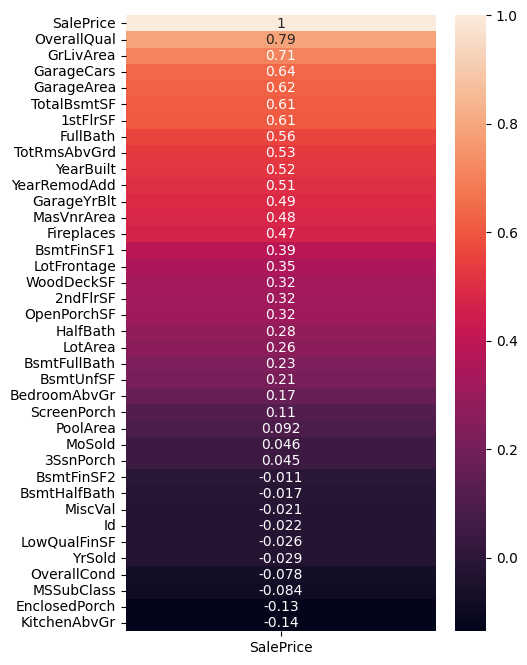

In [57]:
# Visualizing the correlation in seaborn

plt.figure(figsize=(5,8))
sns.heatmap(df[numerical_cols].corr().sort_values('SalePrice', ascending=False)[['SalePrice']], annot=True)
plt.show()

In [56]:
# Testing correlation between garage cars and garage area
df[['GarageCars','GarageArea']].corr()

,GarageCars,GarageArea
GarageCars,1.000000,0.882475
GarageArea,0.882475,1.000000


Both these are highly correlates to each other and hence we won't use both these features.

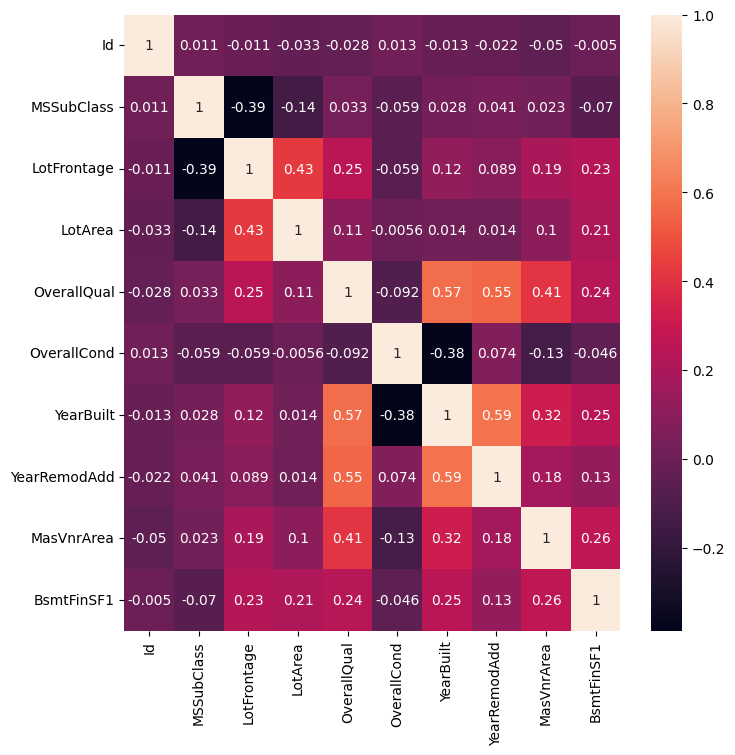

In [58]:
# Plot to visualize correlation between top features which are highly correlated to SalePrice

plt.figure(figsize=(8,8))
sns.heatmap(
    df[numerical_cols].corr().iloc[:10,:10],
    annot=True
)
plt.show()

In [64]:
# Distribution plot for categorical features
df['KitchenQual'].value_counts()


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

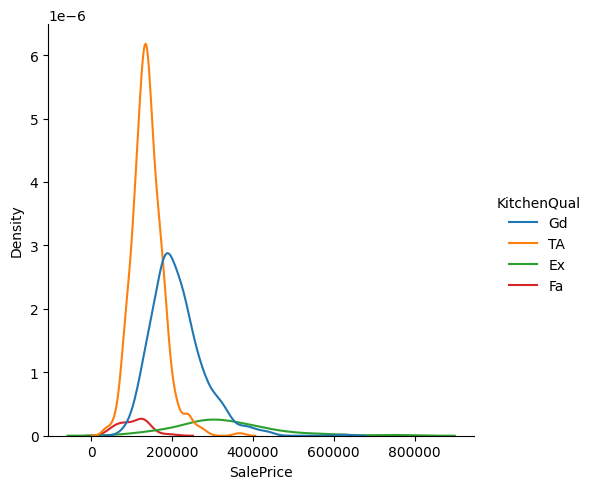

In [69]:
sns.displot(data=df, x='SalePrice', hue='KitchenQual', kind='kde')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

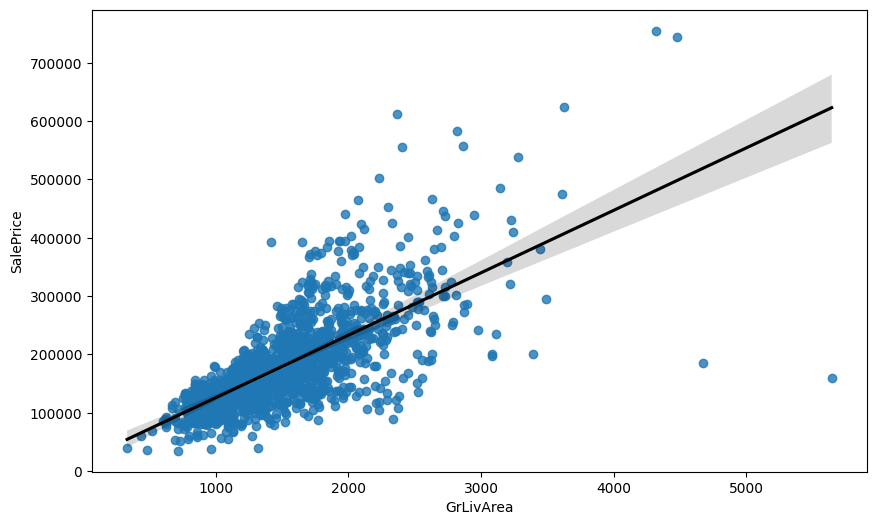

In [73]:
# Scatter with regression lines  Plot to see how Living area relates to Sale Price
plt.figure(figsize=(10,6))
sns.regplot(df,x='GrLivArea', y='SalePrice', line_kws=dict(color='k'))

<Axes: ylabel='SalePrice'>

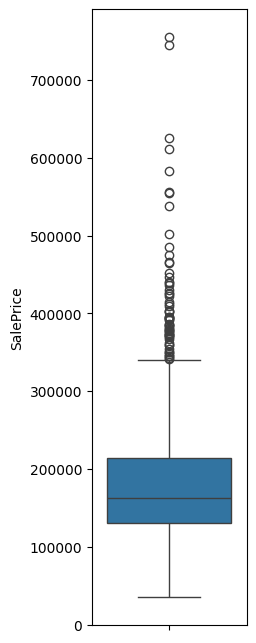

In [75]:
# Finding outlier with Box Plot
plt.figure(figsize=(2,8))
sns.boxplot(df['SalePrice'])

### 5. Feature Preprocessing

#### Why we need to do feature pore-processing?
1. Treating the outliers.
2. Bringing all the features to same scale.
3. Missing value substition.
4. Converting Categorical to numerical data

In [78]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

#### Categorical Features


##### 1. **one-hot encoding**
|ITEM|COLOR|
|----|-----|
|Item1|Blue|
|Item2|Green|
|Item3|Blue|
|Item4|Yellow|

Will be converted as

|ITEM|COl_B|COL_G|COL_Y|
|----|-----|-----|-----|
|Item1|1|0|0|
|Item2|0|1|0|
|Item3|1|0|0|
|Item4|0|0|1|

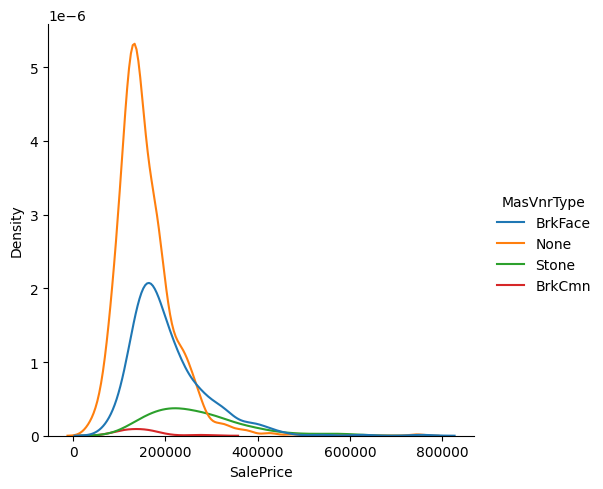

In [89]:
df['MasVnrType'].value_counts()
sns.displot(data=df, x='SalePrice', hue='MasVnrType', kind='kde')

In [90]:
# Generating One hot encoded columns using pandas get_dummies() function.
pd.get_dummies(df['MasVnrType'])

,BrkCmn,BrkFace,None,Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,0,1
1457,0,0,1,0
1458,0,0,1,0


##### 2. **Ordenal Encoding**
|ITEM|COLOR|
|----|-----|
|Item1|Blue|
|Item2|Green|
|Item3|Blue|
|Item4|Yellow|

Here we will order the color based on priority. For example if Yellow > Blue > Green

|ITEM|COLOR|
|----|-----|
|Item1|2|
|Item2|1|
|Item3|2|
|Item4|3|

In [92]:
ordinl_mapping = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}

df.apply(lambda x : ordinl_mapping[x['KitchenQual']], axis=1)

0       3
1       2
2       3
3       3
4       3
       ..
1455    2
1456    2
1457    3
1458    3
1459    2
Length: 1460, dtype: int64

In [93]:
df['KitchenQualEnc'] = df.apply(lambda x : ordinl_mapping[x['KitchenQual']], axis=1)

In [95]:
df[['KitchenQual', 'KitchenQualEnc']].sample(20)

,KitchenQual,KitchenQualEnc
131,Gd,3
1275,TA,2
1365,Gd,3
102,TA,2
516,TA,2
497,TA,2
685,Gd,3
978,TA,2
346,TA,2
1358,Gd,3


#### Outliers and Skewed data




##### 1. Log transformation
If feature values are positive, can apply the logarithm to comporess thye range of values taken b y the feature. This helps reduce the skew and extreme values of outliers

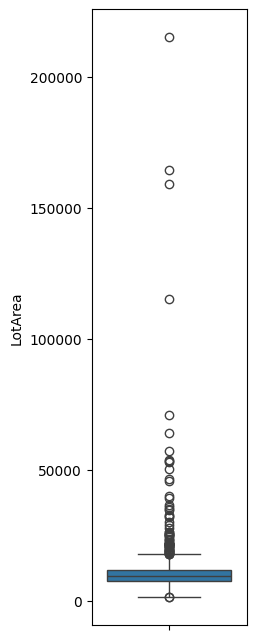

In [97]:
plt.figure(figsize=(2,8))
sns.boxplot(df['LotArea'])
plt.show()

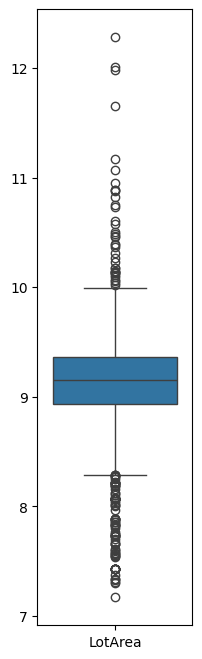

In [101]:
plt.figure(figsize=(2,8))
sns.boxplot(np.log(df[['LotArea']]))
plt.show()

##### 2. Quantile transform
It estimates the distribution of a feature, then transforms values to be roughly uniformly distributed in [0,1]

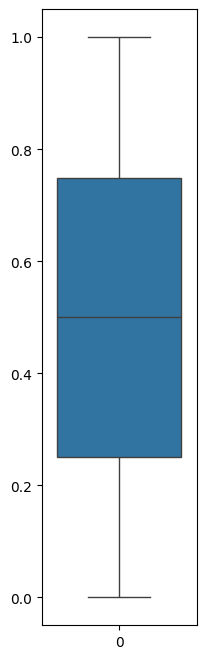

In [100]:
q = QuantileTransformer()
plt.figure(figsize=(2,8))
sns.boxplot(q.fit_transform(df[['LotArea']]))
plt.show()

In [104]:
df['LotAreaLog'] = np.log(df['LotArea'])
df['LotAreaQtl'] = q.fit_transform(df[['LotArea']])

<Axes: >

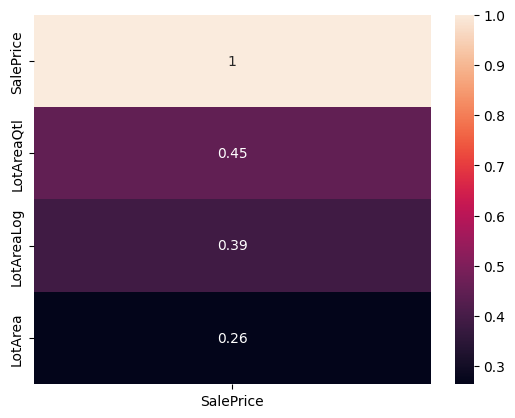

In [108]:
## Checking Correlation of all three
sns.heatmap(
    df[['SalePrice','LotArea','LotAreaLog','LotAreaQtl']].corr().sort_values('SalePrice', ascending=False)[['SalePrice']],
    annot = True
    )

#### Feature Scaling

1. **Standard scaler** : Compute mean and variance of each feature, then shift and scale to have zero mean and unit variance
- `scaled_value = (value - mean) / standard_deviation`
2. **MinMax scaler** : Compute maximum and minimum of each feature, then shift and scale to place values in [0,1]
- `scaled_value = (value - min_value) / (max_value - min_value)`

In [109]:
s = StandardScaler()
df['LotAreaStd'] = s.fit_transform(df[['LotArea']])

In [110]:
m = MinMaxScaler()
df['LotAreaMM'] = m.fit_transform(df[['LotArea']])

In [111]:
df[['LotArea','LotAreaStd','LotAreaMM']].sample(10)

,LotArea,LotAreaStd,LotAreaMM
1051,11175,0.065963,0.046157
463,11988,0.147444,0.049957
608,12168,0.165484,0.050798
834,7875,-0.264769,0.030732
1343,7558,-0.296540,0.029251
441,12108,0.159470,0.050518
1301,7500,-0.302353,0.028979
86,11911,0.139727,0.049597
899,6993,-0.353165,0.026610
1202,6000,-0.452686,0.021968


<Axes: >

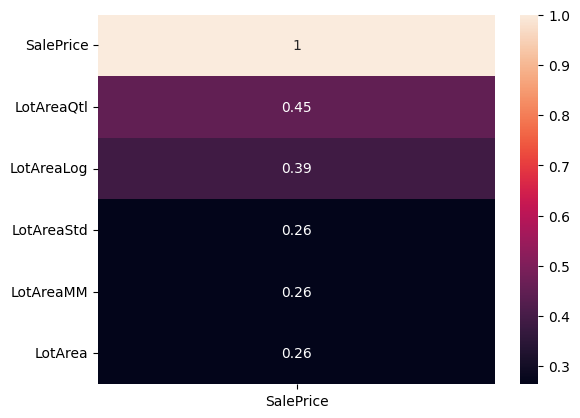

In [112]:
## Checking Correlation of all five
sns.heatmap(
    df[['SalePrice','LotArea','LotAreaLog','LotAreaQtl','LotAreaStd','LotAreaMM']].corr().sort_values('SalePrice', ascending=False)[['SalePrice']],
    annot = True
    )

# We can see that scaling the values with Standard Scaler or MinMax Scaler doesn't have any affect on the correlation.

#### Nonlinear Relationships

We can capture non linear relationship with polynomial such as x^2 etc

#### Missing data imputation

1. **mean imputation** : Impute the mean of non missing values for the missing values
2. **median imputation** : Imputing the median of non missing values for the missing values if there are outliers
3. **mode imputation** : Impute the value occuring most time for categorical value
4. **Zero imputation** : Impute all the missing values with zero.
5. **Hot Deck imputation** : For the incremental improvement in accuracy.


In [119]:
# Creating a dictionary which contains mean of all the numerical columns
num_col_mean = df[numerical_cols].mean().to_dict()
num_col_median = df[numerical_cols].median().to_dict()

In [121]:
num_col_median

{'Id': 730.5,
 'MSSubClass': 50.0,
 'LotFrontage': 69.0,
 'LotArea': 9478.5,
 'OverallQual': 6.0,
 'OverallCond': 5.0,
 'YearBuilt': 1973.0,
 'YearRemodAdd': 1994.0,
 'MasVnrArea': 0.0,
 'BsmtFinSF1': 383.5,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 477.5,
 'TotalBsmtSF': 991.5,
 '1stFlrSF': 1087.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 1464.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'FullBath': 2.0,
 'HalfBath': 0.0,
 'BedroomAbvGr': 3.0,
 'KitchenAbvGr': 1.0,
 'TotRmsAbvGrd': 6.0,
 'Fireplaces': 1.0,
 'GarageYrBlt': 1980.0,
 'GarageCars': 2.0,
 'GarageArea': 480.0,
 'WoodDeckSF': 0.0,
 'OpenPorchSF': 25.0,
 'EnclosedPorch': 0.0,
 '3SsnPorch': 0.0,
 'ScreenPorch': 0.0,
 'PoolArea': 0.0,
 'MiscVal': 0.0,
 'MoSold': 6.0,
 'YrSold': 2008.0,
 'SalePrice': 163000.0}

#### Principal Component Analysis - correlated data ?

A way to reduce number of features from the data set. How?

### Feature Selection

**Systematic method to select which features to use**
1. Filter Methods : Sort features based on estimated predictive power.
2. Wrapper Methods : Fit many models to test different features subset
3. Embedded Methods : Features selected as part of fitting a model

* Two common Greedy approches for wrapper method: Both have high computation cost
1. Forward selection
2. Backward selection

* Embedded method is called **Lasso** method. When fitting amodel add penlty for using large coefficient in addition to prediction error.
*` error = least square + sum(Absolute value of all the coefficients)`